In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Use 2019 Q1 - 2025 Q3 data

# First, an investigation of stock prices
We get the close prices and volumes of each stock we are interested in. We also calculate the returns of each stock because prices are non-stationary and can rise over time even without meaningful relationships, while returns measure actual percentage changes in value. However, we want to use the the natural log of the returns to utilize some of its nice properties. For example, simple returns don't capture compounding changes well. If a stock rises 10% one day but drops 10% the next, the total isn't 0%, but actually -1%. For this case, simple returns would require multiplying, while log would just be additive.

We should also note that because SPY includes large-cap AI-related firms, correlations between individual stocks and SPY partially reflect mechanical overlap as well as broader market co-movement. But we can and should still use SPY as a benchmark.

In [2]:
AAPL = yf.Ticker("AAPL")
META = yf.Ticker("META")
AMZN = yf.Ticker("AMZN")
NVDA = yf.Ticker("NVDA")
GOOG = yf.Ticker("GOOG")
SPY = yf.Ticker("SPY")

In [3]:
def get_returns(ticker):
    start_date = "2019-01-01"
    end_date = "2025-09-30"
    returns = ticker.history(start=start_date, end=end_date)
    returns['simple_return'] = returns['Close'].pct_change()
    returns['log_return'] = np.log(returns['Close'] / returns['Close'].shift(1))
    returns = returns[['simple_return', 'log_return', 'Close', 'Volume']]
    return returns

AAPL_returns = get_returns(AAPL)
META_returns = get_returns(META)
AMZN_returns = get_returns(AMZN)
NVDA_returns = get_returns(NVDA)
GOOG_returns = get_returns(GOOG)
SPY_returns = get_returns(SPY)

In [13]:
returns_data = {
    'NVDA': NVDA_returns,
    'AAPL': AAPL_returns,
    'META': META_returns,
    'AMZN': AMZN_returns,
    'GOOG': GOOG_returns,
    'SPY': SPY_returns
}

AIboom_cutoff = pd.Timestamp('2022-08-01')

c:\Users\danie\miniforge3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


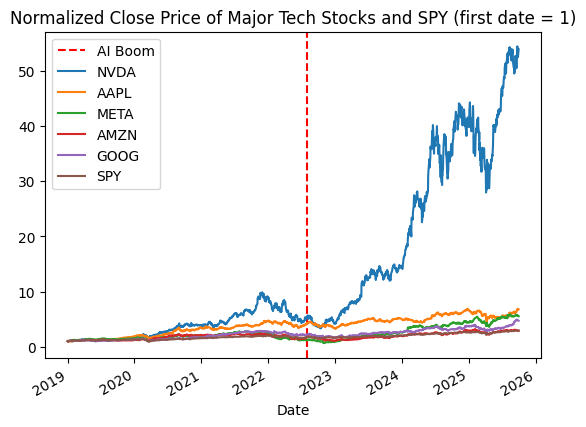

In [15]:
def plot_close_price_normalized(ticker_returns):
    plt.title(f'Normalized Close Price of Major Tech Stocks and SPY (first date = 1)')
    plt.axvline(x=AIboom_cutoff, color='red', linestyle='--', label='AI Boom')
    for name, returns_df in ticker_returns.items():
        normalized_close = returns_df['Close'] / returns_df['Close'].iloc[0]
        normalized_close.plot(label=name)
    plt.legend()
    plt.show()

plot_close_price_normalized(returns_data)


Because NVDA dominates this graph we will get the log to get a better look

c:\Users\danie\miniforge3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


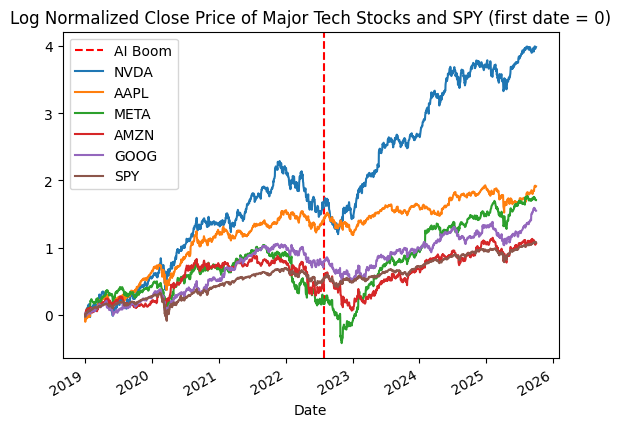

In [16]:
def log_plot_close_price_normalized(ticker_returns):
    plt.title('Log Normalized Close Price of Major Tech Stocks and SPY (first date = 0)')
    plt.axvline(x=AIboom_cutoff, color='red', linestyle='--', label='AI Boom')
    for name, returns_df in ticker_returns.items():
        normalized_close = np.log(returns_df['Close'] / returns_df['Close'].iloc[0])
        normalized_close.plot(label=name)
    plt.legend()
    plt.show()

log_plot_close_price_normalized(returns_data)

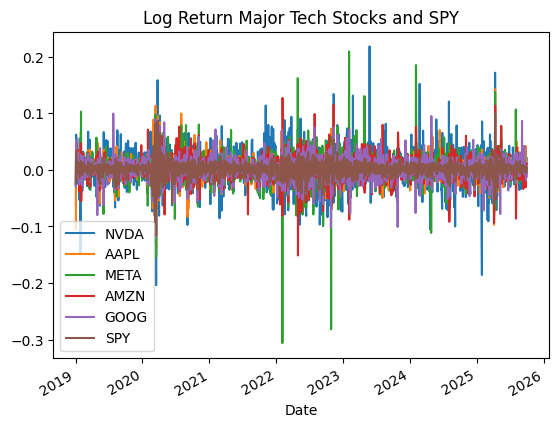

In [12]:
def plot_log_returns(ticker_returns):
    plt.title(f'Log Return Major Tech Stocks and SPY')
    for name, returns_df in ticker_returns.items():
        returns_df['log_return'].plot(label=name)
    plt.legend()
    plt.show()

plot_log_returns(returns_data)

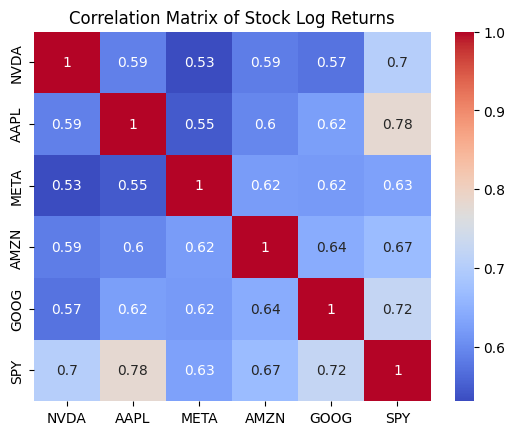

In [8]:
def get_correlation_matrix(ticker_returns, metric='log_return'):
    returns_data = {}
    for name, returns_df in ticker_returns.items():
        returns_data[name] = returns_df[metric]
    
    combined_returns = pd.DataFrame(returns_data)
    return combined_returns.corr()

correlation_matrix = get_correlation_matrix(returns_data)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Log Returns')
plt.show()